In [16]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
url="https://data.cityofnewyork.us/resource/8h5j-fqxa.csv?borough=4&block=528&lot=50"

In [4]:
df=pd.read_table(url,sep=',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 14 columns):
DOCUMENT ID            185 non-null object
RECORD TYPE            185 non-null object
BOROUGH                185 non-null int64
BLOCK                  185 non-null int64
LOT                    185 non-null int64
EASEMENT               185 non-null object
PARTIAL LOT            185 non-null object
AIR RIGHTS             185 non-null object
SUBTERRANEAN RIGHTS    185 non-null object
PROPERTY TYPE          185 non-null object
STREET NUMBER          177 non-null object
STREET NAME            177 non-null object
UNIT                   166 non-null object
GOOD THROUGH DATE      185 non-null object
dtypes: int64(3), object(11)
memory usage: 21.7+ KB


In [6]:
docids = df['DOCUMENT ID']
urlbase="https://data.cityofnewyork.us/resource/bnx9-e6tj.csv?$where=document_id='"
l = len(docids)
n = l // 100 
masterlist = [] 
for i in range(n+1):
    if i < n:
        url = urlbase + "'%20or%20document_id='".join(docids[i*100:(i+1)*100]) + "'"
        #print url 
        masterlist.append(pd.read_table(url,sep=','))
    else:
        url=urlbase + "'%20or%20document_id='".join(docids[i*100:l]) + "'"
        #print url
        masterlist.append(pd.read_table(url,sep=',')) 
    


In [7]:
masters = pd.concat(masterlist)
masters.head()

,DOCUMENT ID,RECORD TYPE,CRFN,BOROUGH,DOC. TYPE,DOC. DATE,DOC. AMOUNT,RECORDED / FILED,MODIFIED DATE,REEL YEAR,REEL NBR,REEL PAGE,% TRANSFERRED,GOOD THROUGH DATE
0,2015090300204001,A,2.015000e+12,1,RPTT&RET,08/25/2015,418000,09/16/2015,09/16/2015,0,0,0,100,09/30/2015
1,2013032801109001,A,2.013000e+12,1,RPTT&RET,04/01/2013,190000,04/25/2013,04/25/2013,0,0,0,100,07/31/2015
2,2007122100640001,A,2.008000e+12,1,RPTT&RET,12/28/2007,278000,01/31/2008,01/31/2008,0,0,0,100,07/31/2015
3,2013080100371001,A,2.013000e+12,1,RPTT&RET,07/25/2013,298000,08/26/2013,08/26/2013,0,0,0,100,07/31/2015
4,2013010301805001,A,2.013000e+12,1,RPTT&RET,01/16/2013,375000,03/15/2013,03/15/2013,0,0,0,100,07/31/2015


In [8]:
mergeddf = pd.merge(df,masters,on=['DOCUMENT ID'])
mergeddf.head()

,DOCUMENT ID,RECORD TYPE_x,BOROUGH_x,BLOCK,LOT,EASEMENT,PARTIAL LOT,AIR RIGHTS,SUBTERRANEAN RIGHTS,PROPERTY TYPE,...,DOC. TYPE,DOC. DATE,DOC. AMOUNT,RECORDED / FILED,MODIFIED DATE,REEL YEAR,REEL NBR,REEL PAGE,% TRANSFERRED,GOOD THROUGH DATE_y
0,2015090300204001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,08/25/2015,418000,09/16/2015,09/16/2015,0,0,0,100,09/30/2015
1,2011012100554001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,01/24/2011,300000,02/08/2011,02/08/2011,0,0,0,100,07/31/2015
2,2013112100798001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,11/14/2013,325000,12/03/2013,12/03/2013,0,0,0,100,07/31/2015
3,2010090101085001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,09/01/2010,332500,09/13/2010,09/13/2010,0,0,0,100,07/31/2015
4,FT_4320004196832,L,4,528,50,N,E,N,N,PA,...,REL,NaN,0,03/22/1994,03/22/1994,1994,3824,166,0,07/31/2015


In [9]:
#clean up column names
#todo setup with re or similar to eliminte all chars except alpha and _ 
mergeddf.columns = mergeddf.columns.str.replace(' ','')
mergeddf.columns = mergeddf.columns.str.replace('.','')
mergeddf.columns = mergeddf.columns.str.lower()
mergeddf.columns

Index([u'documentid', u'recordtype_x', u'borough_x', u'block', u'lot',
       u'easement', u'partiallot', u'airrights', u'subterraneanrights',
       u'propertytype', u'streetnumber', u'streetname', u'unit',
       u'goodthroughdate_x', u'recordtype_y', u'crfn', u'borough_y',
       u'doctype', u'docdate', u'docamount', u'recorded/filed',
       u'modifieddate', u'reelyear', u'reelnbr', u'reelpage', u'%transferred',
       u'goodthroughdate_y'],
      dtype='object')

In [10]:
#check data types
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 27 columns):
documentid            185 non-null object
recordtype_x          185 non-null object
borough_x             185 non-null int64
block                 185 non-null int64
lot                   185 non-null int64
easement              185 non-null object
partiallot            185 non-null object
airrights             185 non-null object
subterraneanrights    185 non-null object
propertytype          185 non-null object
streetnumber          177 non-null object
streetname            177 non-null object
unit                  166 non-null object
goodthroughdate_x     185 non-null object
recordtype_y          185 non-null object
crfn                  169 non-null float64
borough_y             185 non-null int64
doctype               185 non-null object
docdate               170 non-null object
docamount             185 non-null int64
recorded/filed        185 non-null object
modifieddate     

In [12]:
#for now limit to just sales so don't have to deal with missing dates on other record types
#todo would be to do a 'bestdate' that would take docdate if its there or recordedfiled if not 
sales=mergeddf[mergeddf.doctype.str.startswith('RPTT')]
sales.head()

,documentid,recordtype_x,borough_x,block,lot,easement,partiallot,airrights,subterraneanrights,propertytype,...,doctype,docdate,docamount,recorded/filed,modifieddate,reelyear,reelnbr,reelpage,%transferred,goodthroughdate_y
0,2015090300204001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,08/25/2015,418000,09/16/2015,09/16/2015,0,0,0,100,09/30/2015
1,2011012100554001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,01/24/2011,300000,02/08/2011,02/08/2011,0,0,0,100,07/31/2015
2,2013112100798001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,11/14/2013,325000,12/03/2013,12/03/2013,0,0,0,100,07/31/2015
3,2010090101085001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,09/01/2010,332500,09/13/2010,09/13/2010,0,0,0,100,07/31/2015
5,2012072701175001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,07/17/2012,315000,08/07/2012,08/07/2012,0,0,0,100,07/31/2015


In [14]:
#fix the date field
from datetime import datetime
sales['date'] = [ datetime.strptime(date_string, '%m/%d/%Y') for date_string in sales['docdate'] ]
sales.date.head()

/Users/helene/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0   2015-08-25
1   2011-01-24
2   2013-11-14
3   2010-09-01
5   2012-07-17
Name: date, dtype: datetime64[ns]

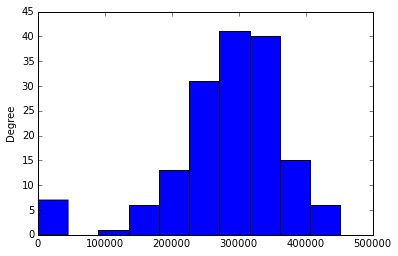

In [17]:
sales.docamount.plot(kind='hist')

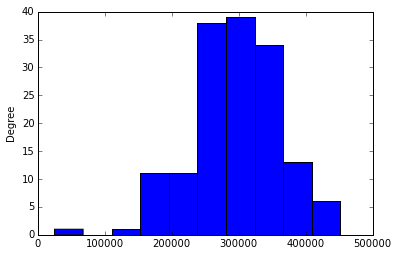

In [18]:
#get rid of zero dollar records
sales = sales[sales.docamount>0]
sales.docamount.plot(kind='hist')
#that one low value probably an outlier as well 

KeyError: 'date'

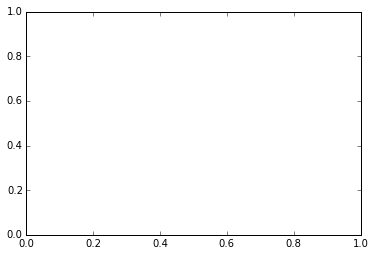

In [43]:
#why does this give an error? 
sales.plot(x='date',y='docamount',kind='scatter')

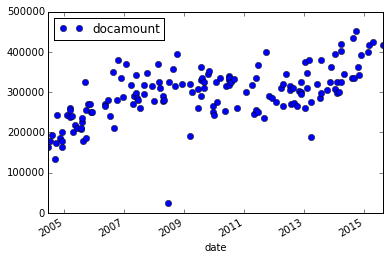

In [46]:
#but this works? 
sales.plot(x='date',y='docamount',style='o')

In [50]:
sales.streetname.value_counts()

14TH STREET      61
21ST STREET      45
21 STREET        14
14 STREET        12
14TH   STREET    10
14TH ST           8
21ST   STREET     1
21 ST             1
21ST ST           1
14 ST             1
dtype: int64